Recall the "Gaussian cloud" problem

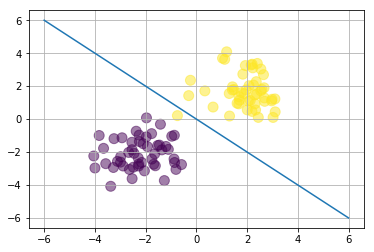

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N = 100
D = 2

# Gaussian centered at 0 (std = 1)
X = np.random.randn(N, D)

# Clever trick: Centering at (-2, -2)
X[:50, :] = X[:50, :] - 2 * np.ones((50, D))

# Centering at (2, 2)
X[50:, :] = X[50:, :] + 2 * np.ones((50, D))

# Array of targets
# First 50 at 0 and next 50 at 1
T = np.array([0]*50 + [1]*50).T 

ones = np.array([[1] * N]).T
Xb = np.concatenate((ones, X), axis=1)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# The separator should be y = -x

w = np.array([0, 4, 4])

plt.scatter(X[:, 0], X[:, 1], c=T, s=100, alpha=0.5)

x_axis = np.linspace(-6, 6, 100)
y_axis = -x_axis #Neat trick
plt.plot(x_axis, y_axis)
plt.grid()

- 2 clouds, one centered at (2, 2), another at (-2, -2). The exact Bayesian solution was: $w = [0, 4, 4]$.
- Represented as $y = mx + b$, or $0 + 4x +4y = 0$ or $y = -x$
- Immediate question: why (4, 4). Why not (1, 1) or (10, 10)? They all do represent the same line...
- You need to consider the objective function. How are we getting our weights?
- $J = t * log(y) + (1 - t) log (1 - y)$ where y is now the output of the logistic regression.
- Look at the plot above, and consider the point (1, 1), which should be classified as 1.
- $\sigma(w^T x) = \sigma(0 * 1 + 1 * 4 + 1 * 4) = \sigma(8) = 0.99966$ 
- We know there is a better value than this: 1. So we will see some error when $y = \sigma(8)$: $J = -0.0003354$
- If weights were [0, 1,  1] ? $ J = -0.126928$ (not as good)
- If weights were [0, 10, 10]? $ J = -0.00000206115e-4$
- Technically, the 'best' weights will be [0, inf, inf]
```
Final w: [-1.13437684  1.66408505  3.03458363] epochs = 200
Final w: [-3.36322902  3.03462023  5.78262208] epochs = 2000
Final w: [-6.06848237  5.05925795  9.69058102] epochs = 20000
Final w: [ -9.02099559   7.38991908  14.12701883], epochs = 200000
```

### Regularization

- The regularization scenario here is different from the regularization scenario in linear regression.
- In linear regression, if you had training data for every input imaginable, you would not overfit. Here, even if you have perfect training data  covering the entire possible input space, you would still overfit.
- The way we regularize, however, is the same. We penalize very large weights with the penalty $J_{reg} = \frac{\lambda}{2} \vert \vert w \vert \vert ^2$
- The cost function now looks like this: $ J = -[T log (Y) + (1 - T) log (1 - Y)] + (\frac{\lambda}{2}) w^T w$
- $\lambda =$ smoothing parameter, balances the cross entropy cost and the regularization penalty.
- Usually between 0.1 and 1. If it is large, weights will be aggressively pushed towards 0, if smaller or 0, weights will just try to minimize cross entropy.
- No universal formula to choose $\lambda$ (might be, but very advanced)

### Solving for w

- Nothing much to it, we still do gradient descent.
- It's just that one term will get added to the update:
   - reg_cost = $\frac{\lambda}{2}(w_0^2 + w_1^2 + w_2^2 + ...)$
   - $\frac{d(reg\_cost)}{dw_i} = \lambda w_i$
   - $\frac{dJ}{dw} = X^T (Y - T) + \lambda w$

### Probabilistic perspective

- Cross-entropy maximizes the likelihood, since J = -log (likelihood)
- Let's make J something we want to maximize:
- $J = +[t log y + (1 - t) log (1 - y)] - \frac{\lambda}{2} \vert \vert w \vert \vert^2$
- $exp(J) = y^t (1 - y)^{(1 - t)} exp(\frac{\lambda \vert \vert w \vert \vert^2}{2})$
- If I exponentiate the first part, I get a binomial (Bernoulli?) distribution for the likelihood
- The other term, the exponentiated -ve squared term is a Gaussian (the prior) 
- So we have one probability distribution times another probability distribution... posterior $\propto$ likelihood $\times$ prior
- $t \sim Bernoulli(y) \Rightarrow (likelihood)$
- $w \sim N(0, \frac{1}{\lambda}) \Rightarrow (prior)$
- Our prior belief about $w$ is that it's Gaussian distributed with variance $\frac{1}{\lambda}$

- Now this is just a consequence of Bayes rule.
- $ P(B \vert A) = \frac{P(A \vert B) P(B)}{P(A)} = \frac{P(A,B)}{P(A)}$
- Great way to remember: "The bottom part is just the top part marginalized over B". Also, it's just a normalizing constant that makes it a probability that makes it sum to 1.
- $P (w \vert X, Y) \propto P ( X, Y \vert w) P (w) $
- **Without regularization, we maximize the likelihood**
- **With regularization, we maximize the posterior** - This is called "maximum a posteriori" or MAP estimation.

In [19]:
import numpy as np

N = 100
D = 2

# Gaussian centered at 0 (std = 1)
X = np.random.randn(N, D)

# Clever trick: Centering at (-2, -2)
X[:50, :] = X[:50, :] - 2 * np.ones((50, D))

# Centering at (2, 2)
X[50:, :] = X[50:, :] + 2 * np.ones((50, D))

# Array of targets
# First 50 at 0 and next 50 at 1
T = np.array([0]*50 + [1]*50).T 

ones = np.array([[1] * N]).T
Xb = np.concatenate((ones, X), axis=1)
w = np.random.randn(D + 1)

# Calculate the model output
z = Xb.dot(w)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

Y = sigmoid(z)

# And what's with these nan errors?

def cross_entropy2(T, Y):
    E = 0
    for i in range(N):
        if T[i] == 1:
            E -= np.log(Y[i])
        else:
            E -= np.log(1 - Y[i])
    return E

w = np.random.randn(D + 1)
z = Xb.dot(w)
Y = sigmoid(z)

learning_rate = 0.1
epochs = 200
for i in range(epochs):
    if i % 10 == 0:
        print(cross_entropy2(T, Y))
        
    w += learning_rate * (np.dot((T - Y).T, Xb) - 0.1 * w)
    Y = sigmoid(Xb.dot(w))
    
print("Final w:", w, "epochs =", epochs)

418.963295381
1.85370596545e-05
5.26150538204e-05
0.000135300897243
0.000318352565888
0.000691557452008
0.00139814439325
0.00264943326808
0.00473449635094
0.00801925027307
0.0129292081768
0.0199127357673
0.0293880109195
0.0416849236619
0.0569979198586
0.0753651099242
0.0966873462047
0.120795638309
0.147536957182
0.176758923915
Final w: [ 0.22044852  3.2683155   2.52689927] epochs = 200
